## **PROGETTO MOBD: MULTICLASS CLASSIFICATION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import sklearn.svm as svm
import seaborn as sns
from google.colab import drive

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print('scikit-learn:', sklearn.__version__)

numpy: 1.19.5
pandas: 1.1.5
matplotlib: 3.2.2
scikit-learn: 0.22.2.post1


In [2]:
drive.mount('ProjMOBD')
dataset = pd.read_csv("/content/ProjMOBD/My Drive/MOBD_Project/Project/dataset.csv")
dataset.describe(include='all')


Mounted at ProjMOBD


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,CLASS
count,7994.000000,7994.000000,7999.000000,7999.000000,7996.000000,7994.000000,7996.000000,7991.000000,7994.000000,7994.000000,7995.000000,7994.000000,7997.000000,7990.000000,7998.000000,7994.000000,7996.000000,7993.000000,7995.000000,7997.000000,8000.000000
mean,-0.013077,-0.261413,-0.356239,-0.107298,-0.505798,0.170845,-0.142636,0.135534,-0.004581,0.017338,-0.099617,0.000023,-0.051170,-0.011521,0.032990,-0.294768,-0.026807,-0.293875,0.001092,-0.355555,1.463375
std,1.006235,1.852793,1.794600,3.038362,1.818965,3.802454,1.901893,1.846124,1.005507,1.005563,5.072744,1.960223,1.936503,2.069112,2.013245,1.970592,0.978187,1.971526,0.996603,1.794666,1.231198
min,-4.181155,-6.980290,-7.563245,-13.133565,-9.011808,-15.887455,-7.934826,-8.608330,-3.472781,-3.697495,-19.416383,-7.212589,-8.133189,-7.823196,-8.969136,-7.037129,-3.621038,-7.037129,-4.013615,-7.563245,0.000000
25%,-0.698506,-1.441144,-1.564076,-1.854212,-1.735180,-2.187097,-1.412976,-1.099665,-0.684807,-0.672081,-3.441473,-1.325372,-1.337362,-1.383780,-1.298123,-1.612006,-0.689233,-1.612119,-0.669021,-1.563262,0.000000
50%,-0.028194,-0.261095,-0.375098,-0.022912,-0.511772,0.086112,-0.117316,0.144827,0.004093,0.029326,0.077785,-0.037385,-0.067058,-0.036499,-0.033036,-0.308933,-0.035249,-0.308409,-0.004635,-0.373514,2.000000
75%,0.666096,0.944857,0.824168,1.757135,0.691109,2.445748,1.121002,1.411072,0.664729,0.704140,3.373961,1.283942,1.245172,1.365177,1.314362,1.021518,0.634916,1.022557,0.676510,0.825741,3.000000
max,3.774161,7.155359,6.774458,10.975842,6.420768,17.343261,7.222491,6.664533,3.811616,3.391975,19.260556,7.181241,8.819808,7.970802,9.235606,9.415568,3.951352,9.415568,3.606960,6.774458,3.000000


## **ANALISI DEL DATASET**



*   percentuale esempi negativi e positivi
*   ripartizione numero di tuple per classe
*   plot significativi 






In [ ]:
counts = dataset['CLASS'].value_counts()
n_false = counts[0]
n_true = counts[1]
print('Frazione di esempi negativi', round(n_false / (n_false + n_true), 4))
print('Frazione di esempi positivi', round(n_true / (n_false + n_true), 4))

Frazione di esempi negativi 0.6781
Frazione di esempi positivi 0.3219


In [ ]:
print(dataset.groupby('CLASS').size())

CLASS
0    2694
1    1279
2    1653
3    2374
dtype: int64


In [ ]:
sns.pairplot(dataset, hue='CLASS',height=2)

Output hidden; open in https://colab.research.google.com to view.

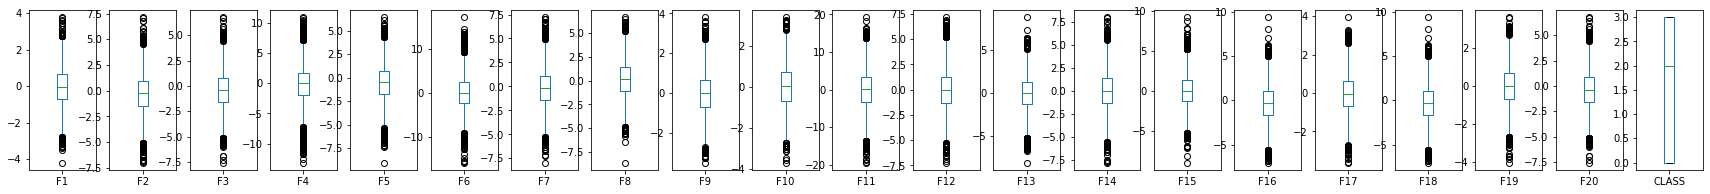

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
dataset.plot(kind='box', subplots=True, layout=(3,21), sharex=False, sharey=False)
plt.show()


## **PREPROCESSING**





1.   Controllo e rimozione dei campi NAN con la media dei valori di ogni feature
2.   Controllo di eventuali duplicati: non sono state trovate tuple identiche
3.   Suddivisione dataset: X contiene le feature e Y i valori di CLASS
4.   Definizione del training set e del test set con split 80%-20%
5.   Standardizzazione
6.   Definizione di eventuali metriche da utilizzare e k-cross- validation










In [ ]:
# funzione che conta il numero di valori mancanti per ogni attributo
def get_na_count(dataset):
    # per ogni elemento (i,j) del dataset, isna() restituisce 
    # TRUE/FALSE se il valore corrispondente è mancante/presente
    boolean_mask = dataset.isna()
    # contiamo il numero di TRUE per ogni attributo sul dataset
    return boolean_mask.sum(axis=0)

In [ ]:
####### Rimuove i campi NAN dal dataset ####
def media_val_dataset(nome):
  F_mean_train = dataset[nome].mean()
  dataset[nome]=dataset[nome].fillna(F_mean_train)

In [ ]:
####### Funzione di standardizzazione, input: dataset, media, dev.standard ######
def standardizzazione(data, mm, std):
  data = data - mm
  data = data/std
  return data

In [ ]:
###### Search valori duplicati ####
dups = dataset.duplicated()
# report duplicati
print(dups.any())
# lista riga duplicati
print(dataset[dups])

False
Empty DataFrame
Columns: [F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, CLASS]
Index: []


In [ ]:
######### colonne feature #################################
column_names = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11','F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20']

In [ ]:
######### Gestione NaN del dataset ################
summary_x = get_na_count(dataset)
print(summary_x)


for i in column_names:
  media_val_dataset(i)

summary_x = get_na_count(dataset)
print(summary_x)

####### definisco la parte di train e di test ######
x = dataset.iloc[:,0:20].values
y = dataset.iloc[:,20].values
####################################################

F1        6
F2        6
F3        1
F4        1
F5        4
F6        6
F7        4
F8        9
F9        6
F10       6
F11       5
F12       6
F13       3
F14      10
F15       2
F16       6
F17       4
F18       7
F19       5
F20       3
CLASS     0
dtype: int64
F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
CLASS    0
dtype: int64


In [ ]:
###### Split dataset 80%-20% #######################
TRAIN_SPLIT = int(len(x)*0.80)
train_x = x[:TRAIN_SPLIT]
train_y = y[:TRAIN_SPLIT]
test_x = x[TRAIN_SPLIT:]
test_y = y[TRAIN_SPLIT:]

In [ ]:
############# Standardizzazione #########
mean_train= np.mean(train_x)
std_train = np.std(train_x)
train_x_stand= standardizzazione(train_x, mean_train, std_train)
test_x_stand= standardizzazione(test_x, mean_train, std_train)

In [ ]:
################ Metriche ######################
def evaluate_classifier(classifier, test_x, test_y):
    pred_y = classifier.predict(test_x)
    confusion_matrix = metrics.confusion_matrix(test_y, pred_y)
    print(confusion_matrix)
    f1_score = metrics.f1_score(test_y, pred_y, average='macro')
    acc_score = metrics.accuracy_score(test_y, pred_y)
    print('F1: ', f1_score)
    print('Accuracy: ', acc_score)

In [ ]:
################## K cross validation ###############
def k_fold_cross_validation_svm(scaled_train_x, k=5, C=1, kernel='linear', degree=3, gamma='auto'):
    avg_score = 0
    cv = model_selection.KFold(n_splits=k, random_state=0)
    classifier = svm.SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
    for train_index, test_index in cv.split(scaled_train_x):
        fold_train_x, fold_test_x = x[train_index], x[test_index]
        fold_train_y, fold_test_y = y[train_index], y[test_index]
        classifier.fit(fold_train_x, fold_train_y)
        fold_pred_y = classifier.predict(fold_test_x)
        score = metrics.accuracy_score(fold_test_y, fold_pred_y)
        print(score)
        avg_score += score
    avg_score = avg_score / k
    return avg_score

## **TRAINING & VALIDATION**



*   Import delle librerie
*   Inizializzazione parametri necessari per il report finale



Per ogni classe di classificatore:
*   Ricerca degli iperparametri tramite k cross validation: 
      *   Controllo f1-macro
      *   Controllo accuratezza
*   Calcolo tempo di processamento
*   Seleziona parametri che massimizzano la f1-macro
*   Plot parametrico
*   Fit e Predict del classificatore con i parametri ottenuti
*   Salvataggio parametri, f1-macro e accuratezza per ogni classificatore





Classificatori:
* KNN
* Support Vector Machine RBF: OVR & OVO
* Support Vector Machine Poly: OVR & OVO
* Support Vector Machine with Kernel Linear: OVR & OVO
* Support Vector Machine with Kernel Sigmoid: OVR & OVO
* LinearSVC
* Random Forest
  * Import Features
* DecisionTree
  * Pruning
* AdaBoost SAMME.R
* AdaBoost SAMME
* Bagging

Summary



In [ ]:
import time
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
classifier_r = []
parameters_r = []
f1score_r = []
accuracy_r = []

###KNN

In [ ]:

start_time = time.time()
print("Running ...")
print 
k_val = []
f_score = []
acc = []
print ("\tK\t\tF1-score\tAccuracy")

# Build a kNN using 1-18 neighbour nodes
for i in range(1,18): 
    k_val.append(i)
    nca = NeighborhoodComponentsAnalysis(random_state=42)
    nca.fit(train_x_stand, train_y)
    knn_model = KNeighborsClassifier(n_neighbors=i)
    y_pred = cross_val_predict(knn_model, nca.transform(train_x_stand), train_y, cv=10)
    knn_f1score = f1_score(train_y, y_pred, average='macro')
    knn_accuracy = accuracy_score(train_y, y_pred)
    f_score.append(knn_f1score)
    acc.append(knn_accuracy)
    print ("\t{:f}\t{:f}\t{:f}".format(i,knn_f1score, knn_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	K		F1-score	Accuracy
	1.000000	0.824219	0.837031
	2.000000	0.772249	0.790937
	3.000000	0.828186	0.841094
	4.000000	0.830453	0.843750
	5.000000	0.841794	0.854062
	6.000000	0.834406	0.847812
	7.000000	0.838390	0.852031
	8.000000	0.837220	0.851250
	9.000000	0.838298	0.851875
	10.000000	0.835487	0.850000
	11.000000	0.836894	0.851250
	12.000000	0.835583	0.849531
	13.000000	0.833437	0.848125
	14.000000	0.832360	0.847812
	15.000000	0.832024	0.846875
	16.000000	0.833611	0.848594
	17.000000	0.832200	0.847500
--- Running time: 2130.8274822235107 seconds ---


In [ ]:
# best K
print ("The highest f1 score is {}". format(max(f_score)))
idx = f_score.index(max(f_score))
best_K = k_val[idx]
print ("The best K is {}".format(best_K))

The highest f1 score is 0.8417943541251292
The best K is 5


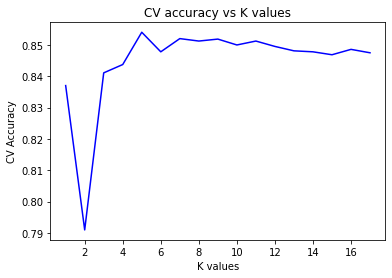

In [ ]:
plt.plot(range(1,18), acc, color='b')
plt.xlabel('K values')    
plt.ylabel('CV Accuracy')
plt.title('CV accuracy vs K values')
plt.show()

In [ ]:
# test performance
start_time = time.time()
print("Running ...")

print ("\tK\t\tF1-score\tAccuracy")
nca = NeighborhoodComponentsAnalysis(random_state=42)
nca.fit(train_x_stand, train_y)
knn_model = KNeighborsClassifier(n_neighbors=best_K)
knn_model.fit(nca.transform(train_x_stand), train_y)
y_pred = knn_model.predict(nca.transform(test_x_stand))
test_acc = accuracy_score(test_y, y_pred)
test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}".format(best_K, test_f1score, test_acc))
print 
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("K-NN")
parameters_r.append("No. of neighbours = {}".format(best_K))
f1score_r.append(test_f1score)
accuracy_r.append(test_acc)

Running ...
	K		F1-score	Accuracy
	5.000000	0.826800	0.845000
Confusion matrix
[[482   8  19  28]
 [ 31 163  19  35]
 [ 20  11 274  25]
 [ 15  15  22 433]]
--- Running time: 123.74899768829346 seconds ---


###Support Vector Machine with RBF

In [ ]:
g = [1e-2, 1e-3, 1e-4]
C = [1, 10, 100, 1000]

gamma_ = []
c_val = []
fscore = []
accur = []
start_time = time.time()
print("Running ...")
print ("\tGamma\t\tC value\t\tF1-score\tAccuracy")

for i in range(0,len(g)):
    for j in C:
        svc = svm.SVC(C=j, kernel='rbf', gamma=g[i]) 
        y_pred = cross_val_predict(svc, train_x_stand, train_y, cv=10)
        svm_fscore = f1_score(train_y, y_pred, average='macro')
        svm_accuracy = accuracy_score(train_y, y_pred)
        gamma_.append(g[i])
        c_val.append(j)
        fscore.append(svm_fscore)
        accur.append(svm_accuracy)
        print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(g[i],j,svm_fscore, svm_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	Gamma		C value		F1-score	Accuracy
	0.010000	1.000000	0.715604	0.742500
	0.010000	10.000000	0.800923	0.817187
	0.010000	100.000000	0.832397	0.845156
	0.010000	1000.000000	0.814205	0.826094
	0.001000	1.000000	0.469686	0.551250
	0.001000	10.000000	0.598026	0.640156
	0.001000	100.000000	0.716893	0.743281
	0.001000	1000.000000	0.802198	0.818906
	0.000100	1.000000	0.258826	0.434844
	0.000100	10.000000	0.451011	0.532031
	0.000100	100.000000	0.535027	0.581875
	0.000100	1000.000000	0.599796	0.640000
--- Running time: 293.8775722980499 seconds ---


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_gamma = gamma_[idx]
best_C = c_val[idx]
print ("The best parameters are gamma={}, C={}".format(best_gamma, best_C))

The highest f1 score is 0.832397190118803
The best parameters are gamma=0.01, C=100


(12, 1)


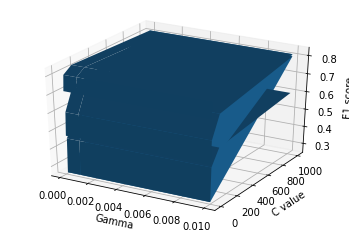

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(gamma_, c_val)
arr = np.array(fscore)
arr=arr.reshape(-1,1)
print(arr.shape)
ax.plot_surface(X, Y, arr)
ax.set_xlabel('Gamma')
ax.set_ylabel('C value')
ax.set_zlabel('F1 score')
plt.show()

In [ ]:
#### Versione OVR

start_time = time.time()
print("Running ...")
print ("\tGamma\t\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='rbf', gamma=best_gamma, C=best_C)
ovr = OneVsRestClassifier(svc)
ovr.fit(train_x_stand,train_y)
y_pred = ovr.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_gamma, best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM_RBF_ovr")
parameters_r.append("Gamma={} C={}".format(best_gamma, best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
	Gamma		C value		F1-score	Accuracy
	0.010000	100.000000	0.839088	0.852500
Confusion matrix
[[489   6  18  24]
 [ 24 175  17  32]
 [ 20  11 268  31]
 [ 24   6  23 432]]
--- Running time: 6.491157054901123 seconds ---


In [ ]:
## La modalità Ovo è anche impostata di default

start_time = time.time()
print("Running ...")
print ("\tGamma\t\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='rbf', gamma=best_gamma, C=best_C)
ovo = OneVsOneClassifier(svc)
ovo.fit(train_x_stand,train_y)
y_pred = ovo.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_gamma, best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM_RBF_ovo")
parameters_r.append("Gamma={} C={}".format(best_gamma, best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
	Gamma		C value		F1-score	Accuracy
	0.010000	100.000000	0.825365	0.841250
Confusion matrix
[[477   8  23  29]
 [ 27 165  22  34]
 [ 17   8 269  36]
 [ 18   7  25 435]]
--- Running time: 2.9040160179138184 seconds ---


###Support Vector Machine with Poly

In [ ]:
d = [2, 4, 8]
C = [1, 10, 100, 1000]

degree_ = []
c_val = []
fscore = []
accur = []
start_time = time.time()
print("Running ...")
print ("\tDegree\t\tC value\t\tF1-score\tAccuracy")

for i in range(0,len(d)):
    for j in C:
        svc = svm.SVC(C=j, kernel='poly', degree=d[i]) 
        y_pred = cross_val_predict(svc, train_x_stand, train_y, cv=10)
        svm_fscore = f1_score(train_y, y_pred, average='macro')
        svm_accuracy = accuracy_score(train_y, y_pred)
        degree_.append(d[i])
        c_val.append(j)
        fscore.append(svm_fscore)
        accur.append(svm_accuracy)
        print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(d[i],j,svm_fscore, svm_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	Degree		C value		F1-score	Accuracy
	2.000000	1.000000	0.783002	0.806250
	2.000000	10.000000	0.823670	0.838750
	2.000000	100.000000	0.827945	0.840781
	2.000000	1000.000000	0.830105	0.842656
	4.000000	1.000000	0.665233	0.696094
	4.000000	10.000000	0.731567	0.756094
	4.000000	100.000000	0.732241	0.751406
	4.000000	1000.000000	0.703541	0.719063
	8.000000	1.000000	0.523550	0.561562
	8.000000	10.000000	0.582421	0.609375
	8.000000	100.000000	0.631379	0.648906
	8.000000	1000.000000	0.660965	0.679063
--- Running time: 642.3840792179108 seconds ---


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_degree = degree_[idx]
best_C = c_val[idx]
print ("The best parameters are degree={}, C={}".format(best_degree, best_C))

The highest f1 score is 0.8301052663754607
The best parameters are degree=2, C=1000


(12, 1)


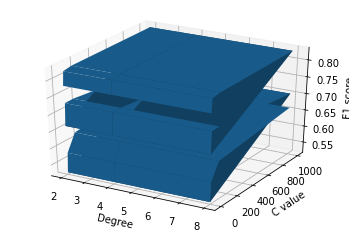

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(degree_, c_val)
arr = np.array(fscore)
arr=arr.reshape(-1,1)
print(arr.shape)
ax.plot_surface(X, Y, arr)
ax.set_xlabel('Degree')
ax.set_ylabel('C value')
ax.set_zlabel('F1 score')
plt.show()

In [ ]:
##### Versione OVR

start_time = time.time()
print("Running ...")
print ("\tDegree\t\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='poly', degree=best_degree, C=best_C)
ovr = OneVsRestClassifier(svc)
ovr.fit(train_x_stand,train_y)
y_pred = ovr.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_degree, best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM_poly_ovr")
parameters_r.append("Degree={} C={}".format(best_degree, best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
	Degree		C value		F1-score	Accuracy
	2.000000	1000.000000	0.841503	0.856875
Confusion matrix
[[487   5  20  25]
 [ 27 168  21  32]
 [ 19   8 274  29]
 [ 19   6  18 442]]
--- Running time: 102.78552412986755 seconds ---


In [ ]:
#####Versione OVO

start_time = time.time()
print("Running ...")
print ("\tDegree\t\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='poly', degree=best_degree, C=best_C)
ovo = OneVsOneClassifier(svc)
ovo.fit(train_x_stand,train_y)
y_pred = ovo.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_degree, best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM_poly_ovo")
parameters_r.append("Degree={} C={}".format(best_degree, best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
	Degree		C value		F1-score	Accuracy
	2.000000	1000.000000	0.826922	0.845000
Confusion matrix
[[483   5  25  24]
 [ 35 160  21  32]
 [ 23  10 272  25]
 [ 18   7  23 437]]
--- Running time: 41.62224340438843 seconds ---


###Support Vector Machine with Kernel Linear

In [ ]:

C = [0.1, 1, 10, 100]

c_val = []
fscore = []
accur = []
start_time = time.time()
print("Running ...")
print ("\tC value\t\tF1-score\tAccuracy")

for i in range(0,1):
    for j in C:
        svc = svm.SVC(C=j, kernel='linear') 
        y_pred = cross_val_predict(svc, train_x_stand, train_y, cv=10)
        svm_fscore = f1_score(train_y, y_pred, average='macro')
        svm_accuracy = accuracy_score(train_y, y_pred)
        c_val.append(j)
        fscore.append(svm_fscore)
        accur.append(svm_accuracy)
        print ("\t{:f}\t{:f}\t{:f}".format(j,svm_fscore, svm_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	C value		F1-score	Accuracy
	0.100000	0.529466	0.575313
	1.000000	0.531392	0.576875
	10.000000	0.531309	0.576250
	100.000000	0.530194	0.575313
--- Running time: 921.1493821144104 seconds ---


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_C = c_val[idx]
print ("The best parameters are  C={}".format( best_C))

The highest f1 score is 0.5313922435274434
The best parameters are  C=1


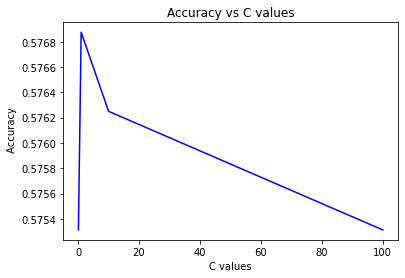

In [ ]:
plt.plot(C, accur, color='b')
plt.xlabel('C values')    
plt.ylabel(' Accuracy')
plt.title('Accuracy vs C values')
plt.show()

In [ ]:

start_time = time.time()
print("Running ...")
print ("\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='linear', C=best_C)
ovr = OneVsRestClassifier(svc)
ovr.fit(train_x_stand,train_y)
y_pred = ovr.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}".format( best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM_linear_ovr")
parameters_r.append(" C={}".format( best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
	C value		F1-score	Accuracy
	1.000000	0.425351	0.500000
Confusion matrix
[[415   8  15  99]
 [102  31  19  96]
 [119  11  99 101]
 [180  15  35 255]]
--- Running time: 9.015122652053833 seconds ---


In [ ]:
start_time = time.time()
print("Running ...")
print ("\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='linear', C=best_C)
svc.fit(train_x_stand,train_y)
y_pred = svc.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}".format( best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM_linear_ovo")
parameters_r.append(" C={}".format( best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
	C value		F1-score	Accuracy
	1.000000	0.527340	0.576875
Confusion matrix
[[442   8  45  42]
 [ 80  62  34  72]
 [ 81  21 173  55]
 [155  30  54 246]]
--- Running time: 3.7540957927703857 seconds ---


###Support Vector Machine with Kernel Sigmoid

In [ ]:

C = [0.1, 1, 10, 100]

c_val = []
fscore = []
accur = []
start_time = time.time()
print("Running ...")
print ("\t\tC value\t\tF1-score\tAccuracy")

for i in range(0,1):
    for j in C:
        svc = svm.SVC(C=j, kernel='sigmoid') 
        y_pred = cross_val_predict(svc, train_x_stand, train_y, cv=10)
        svm_fscore = f1_score(train_y, y_pred, average='macro')
        svm_accuracy = accuracy_score(train_y, y_pred)
        c_val.append(j)
        fscore.append(svm_fscore)
        accur.append(svm_accuracy)
        print ("\t{:f}\t{:f}\t{:f}".format(j,svm_fscore, svm_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
		C value		F1-score	Accuracy
	0.100000	0.350490	0.412656
	1.000000	0.331006	0.379688
	10.000000	0.323433	0.367500
	100.000000	0.323297	0.367031
--- Running time: 75.51076579093933 seconds ---


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_C = c_val[idx]
print ("The best parameters are  C={}".format( best_C))

The highest f1 score is 0.35048962164202796
The best parameters are  C=0.1


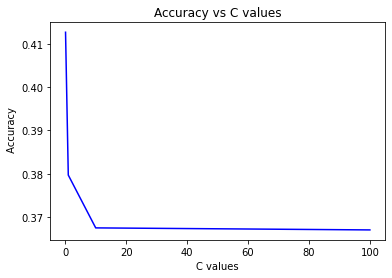

In [ ]:
plt.plot(C, accur, color='b')
plt.xlabel('C values')    
plt.ylabel(' Accuracy')
plt.title('Accuracy vs C values')
plt.show()

In [ ]:

start_time = time.time()
print("Running ...")
print ("\t\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='sigmoid', C=best_C)
ovr = OneVsRestClassifier(svc)
ovr.fit(train_x_stand,train_y)
y_pred = ovr.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}".format( best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM_sigmoid_ovr")
parameters_r.append(" C={}".format( best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
		C value		F1-score	Accuracy
	0.100000	0.359190	0.415000
Confusion matrix
[[292  25  48 172]
 [ 74  33  23 118]
 [ 87  28  78 137]
 [147  33  44 261]]
--- Running time: 5.48349142074585 seconds ---


In [ ]:
start_time = time.time()
print("Running ...")
print ("\t\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='sigmoid', C=best_C)
svc.fit(train_x_stand,train_y)
y_pred = svc.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}".format( best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM_sigmoid_ovo")
parameters_r.append(" C={}".format( best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
		C value		F1-score	Accuracy
	0.100000	0.350551	0.416250
Confusion matrix
[[364   9  55 109]
 [ 93  24  43  88]
 [119  29  94  88]
 [205  49  47 184]]
--- Running time: 3.2451345920562744 seconds ---


###LinearSVC



In [ ]:
m = ['ovr', 'crammer_singer']
C = [0.1, 1, 10]

multi_class_ = []
c_val = []
fscore = []
accur = []
start_time = time.time()
print("Running ...")
print ("\tMultiClass\t\tC value\t\tF1-score\tAccuracy")

for i in range(0,len(m)):
    for j in C:
        svc = svm.LinearSVC(C=j, multi_class=m[i], max_iter = 100000) 
        y_pred = cross_val_predict(svc, train_x_stand, train_y, cv=10)
        svm_fscore = f1_score(train_y, y_pred, average='macro')
        svm_accuracy = accuracy_score(train_y, y_pred)
        multi_class_ .append(m[i])
        c_val.append(j)
        fscore.append(svm_fscore)
        accur.append(svm_accuracy)
        print ("\t{:s}\t{:f}\t{:f}\t{:f}".format(m[i],j,svm_fscore, svm_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	MultiClass		C value		F1-score	Accuracy
	ovr	0.100000	0.497901	0.539062
	ovr	1.000000	0.497673	0.538750
	ovr	10.000000	0.497402	0.538750
	crammer_singer	0.100000	0.494221	0.537344


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

	crammer_singer	1.000000	0.495309	0.537344


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

	crammer_singer	10.000000	0.494439	0.536875
--- Running time: 976.6288838386536 seconds ---


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_multi_class_ = multi_class_[idx]
best_C = c_val[idx]
print ("The best parameters are class={}, C={}".format(best_multi_class_, best_C))

The highest f1 score is 0.49790097653619114
The best parameters are class=ovr, C=0.1


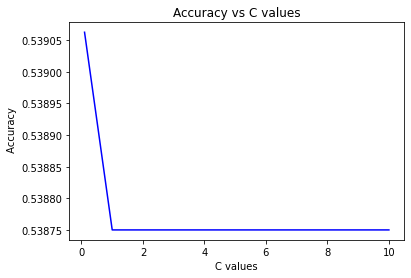

In [ ]:

plt.plot(C, accur[0:3], color='b')
plt.xlabel('C values')    
plt.ylabel(' Accuracy')
plt.title('Accuracy vs C values')
plt.show()


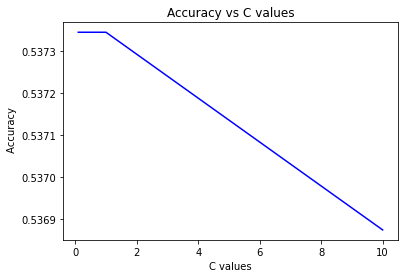

In [ ]:
plt.plot(C, accur[3:], color='b')
plt.xlabel('C values')    
plt.ylabel(' Accuracy')
plt.title('Accuracy vs C values')
plt.show()

In [ ]:

start_time = time.time()
print("Running ...")
print ("\tClass\t\tC value\t\tF1-score\tAccuracy")

svc = svm.LinearSVC( multi_class=best_multi_class_, C=best_C)
svc.fit(train_x_stand,train_y)
y_pred = svc.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:s}\t{:f}\t{:f}\t{:f}".format(best_multi_class_, best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("LinearSVM_classic")
parameters_r.append("MultiClass={} C={}".format(best_multi_class_, best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
	Class		C value		F1-score	Accuracy
	ovr	0.100000	0.485963	0.532500
Confusion matrix
[[399   7  42  89]
 [ 80  58  23  87]
 [ 88  19 140  83]
 [141  25  64 255]]
--- Running time: 0.7322566509246826 seconds ---


In [ ]:

start_time = time.time()
print("Running ...")
print ("\tClass\t\tC value\t\tF1-score\tAccuracy")

svc = svm.LinearSVC( multi_class=best_multi_class_, C=best_C)
ovo = OneVsOneClassifier(svc)
ovo.fit(train_x_stand,train_y)
y_pred = ovo.predict(test_x_stand)
svm_test_acc = accuracy_score(test_y, y_pred)
svm_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:s}\t{:f}\t{:f}\t{:f}".format(best_multi_class_, best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("LinearSVM_classic_ovo")
parameters_r.append("MultiClass={} C={}".format(best_multi_class_, best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...
	Class		C value		F1-score	Accuracy
	ovr	0.100000	0.524419	0.563125
Confusion matrix
[[405  19  39  74]
 [ 64  74  36  74]
 [ 65  21 163  81]
 [130  37  59 259]]
--- Running time: 0.5521683692932129 seconds ---


###Random Forest

In [ ]:
depth = [20,50 ,80 ,100, 200, 300]
trees = [700, 800]

depth_ = []
trees_ = []
fscore = []
accur = []
start_time = time.time()
print("Running ...")


print ("\tDepth\t\tNo. of Trees\tF1-score\tAccuracy")

for i in range(0,len(depth)):
    for j in trees:
        rfclf = RandomForestClassifier(n_estimators=j, max_depth=depth[i], random_state=444)
        y_pred = cross_val_predict(rfclf, train_x_stand, train_y, cv=10)
        rf_f1score = f1_score(train_y, y_pred, average='macro')
        rf_accuracy = accuracy_score(train_y, y_pred)
        depth_.append(depth[i])
        trees_.append(j)
        fscore.append(rf_f1score)
        accur.append(rf_accuracy)
        print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(depth[i],j,rf_f1score, rf_accuracy))
        
print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	Depth		No. of Trees	F1-score	Accuracy
	20.000000	700.000000	0.783125	0.799687
	20.000000	800.000000	0.782399	0.799219
	50.000000	700.000000	0.781772	0.798438
	50.000000	800.000000	0.783335	0.799687
	80.000000	700.000000	0.781772	0.798438
	80.000000	800.000000	0.783335	0.799687
	100.000000	700.000000	0.781772	0.798438
	100.000000	800.000000	0.783335	0.799687
	200.000000	700.000000	0.781772	0.798438
	200.000000	800.000000	0.783335	0.799687
	300.000000	700.000000	0.781772	0.798438
	300.000000	800.000000	0.783335	0.799687
--- Running time: 1744.753905057907 seconds ---


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_depth = depth_[idx]
best_trees = trees_[idx]
print ("The best parameters are tree depth={} with no. of trees={}".format(best_depth, best_trees))

The highest f1 score is 0.783334725714536
The best parameters are tree depth=50 with no. of trees=800


(12, 1)


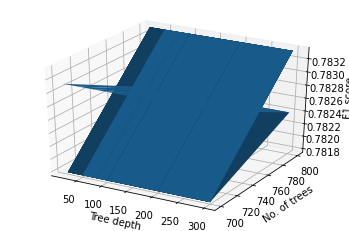

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(depth_, trees_)
arr = np.array(fscore)
arr=arr.reshape(-1,1)
print(arr.shape)
ax.plot_surface(X, Y, arr)
ax.set_xlabel('Tree depth')
ax.set_ylabel('No. of trees')
ax.set_zlabel('F1 score')
plt.show()

In [ ]:

start_time = time.time()
print("Running ...")

print ("\tDepth\t\tNo. of Trees\tF1-score\tAccuracy")

rfclf = RandomForestClassifier(n_estimators=best_trees, max_depth=best_depth, random_state=444)
rfclf.fit(train_x_stand,train_y)
feature_imp= pd.Series(rfclf.feature_importances_, index = column_names).sort_values(ascending = False)
y_pred = rfclf.predict(test_x_stand)
rf_test_acc = accuracy_score(test_y, y_pred)
rf_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_depth, best_trees, rf_test_f1score, rf_test_acc))
print 
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("RF")
parameters_r.append("Depth={} Trees={}".format(best_depth, best_trees))
f1score_r.append(rf_test_f1score)
accuracy_r.append(rf_test_acc)

No handles with labels found to put in legend.


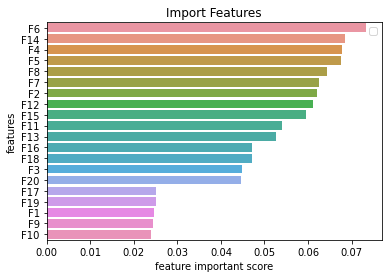

In [ ]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('feature important score')
plt.ylabel('features')
plt.title("Import Features")
plt.legend()
plt.show()

### DecisionTree

In [ ]:
best_max_depth=0
best_max_features=0
best_min_samples_leaf=0


def DecisionTree_param_selection(X, y, n_folds, metric):
    
    # griglia degli iperparametri
    param_grid = {
        'max_depth': [15, 50, 80],
        'max_features': [ 6, 9, 10, 15, 20],
        'min_samples_leaf': [ 2, 3, 9, 15, 20, 100]

    }
    
    clf = model_selection.GridSearchCV(DecisionTreeClassifier(), param_grid, scoring=metric, cv=n_folds, refit=True)
    clf.fit(X, y)
    
    print("Best parameters:")
    print()
    print(clf.best_params_)
    best= list(clf.best_params_.values())
    print()
    print("Grid scores:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    return clf, best


df_classifier, best = DecisionTree_param_selection(train_x_stand, train_y, n_folds=10, metric='accuracy')
best_max_depth=best[0]
best_max_features=best[1]
best_min_samples_leaf=best[2]

Best parameters:

{'max_depth': 15, 'max_features': 15, 'min_samples_leaf': 9}

Grid scores:

0.6053 (+/-0.038) for {'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 2}
0.5955 (+/-0.035) for {'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 3}
0.6183 (+/-0.032) for {'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 9}
0.6184 (+/-0.034) for {'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 15}
0.6089 (+/-0.036) for {'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 20}
0.5453 (+/-0.036) for {'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 100}
0.6034 (+/-0.041) for {'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 2}
0.6156 (+/-0.047) for {'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 3}
0.6306 (+/-0.029) for {'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 9}
0.6223 (+/-0.035) for {'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 15}
0.6200 (+/-0.049) for {'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 20

In [ ]:
dt= DecisionTreeClassifier(max_depth=best_max_depth, max_features=best_max_features, min_samples_leaf=best_min_samples_leaf)
dt=dt.fit(train_x_stand, train_y)


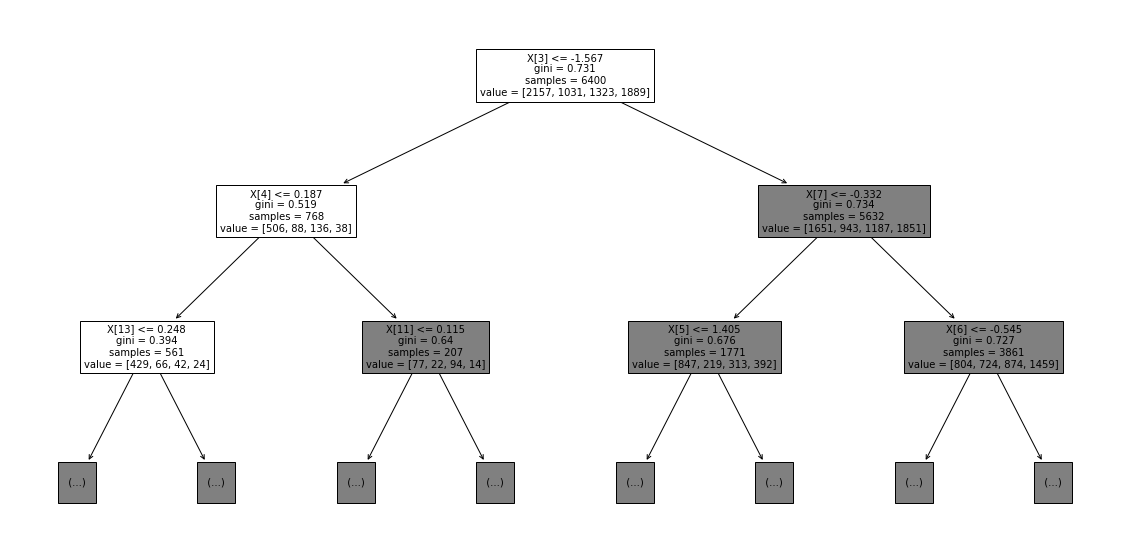

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt, max_depth=2, fontsize=10)
plt.show()

###Pruning

In [ ]:
from sklearn.datasets import load_breast_cancer
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(train_x_stand, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

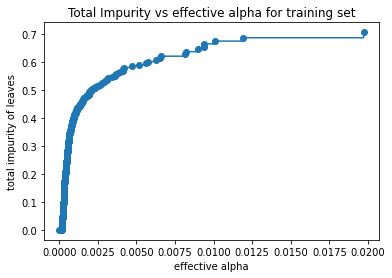

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_x_stand, train_y)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.022768458510890377


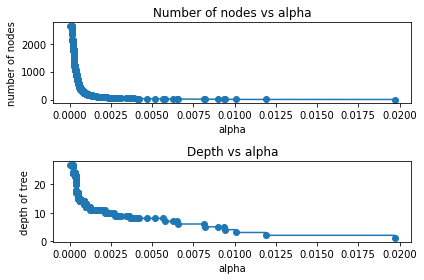

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

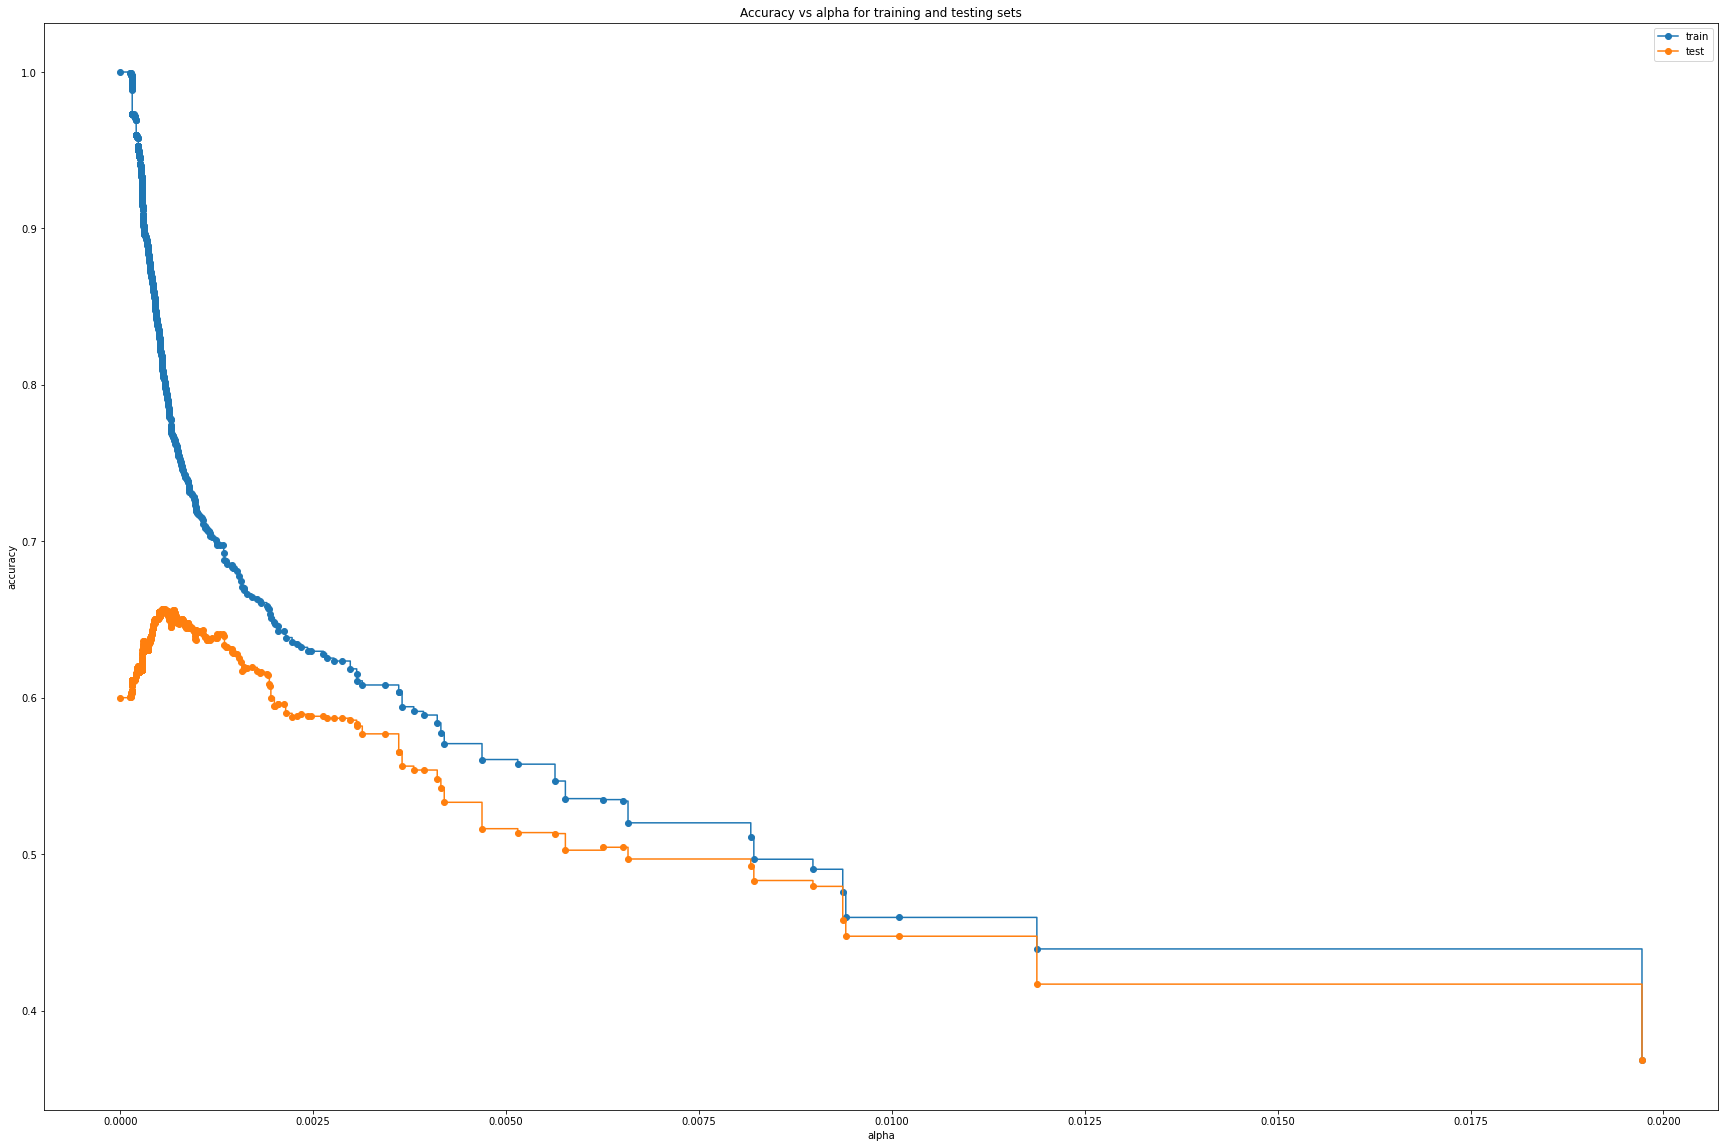

In [ ]:
train_scores = [clf.score(train_x_stand, train_y) for clf in clfs]
test_scores = [clf.score(test_x_stand, test_y) for clf in clfs]

fig, ax = plt.subplots(figsize=(30, 20))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### AdaBoost SAMME.R

In [ ]:
trees = [700, 800, 900, 1000]
lr= [0.01, 0.1, 1, 1.5]



depth_ = []
trees_ = []
fscore = []
accur = []
lr_ =[]
start_time = time.time()
print("Running ...")


print ("\tDepth\t\tLearning rate\t\tNo. of Trees\tF1-score\tAccuracy")

for i in range(len(lr)):
    for j in trees:
        abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth, max_features=best_max_features, min_samples_leaf=best_min_samples_leaf), n_estimators=j, learning_rate=lr[i], algorithm="SAMME.R", random_state=444)
        y_pred = cross_val_predict(abc, train_x_stand, train_y, cv=10)
        rf_f1score = f1_score(train_y, y_pred, average='macro')
        rf_accuracy = accuracy_score(train_y, y_pred)
        depth_.append(best_max_depth)
        lr_.append(lr[i])
        trees_.append(j)
        fscore.append(rf_f1score)
        accur.append(rf_accuracy)
        print ("\t{:f}\t{:f}\t{:f}\t{:f}\t{:f}".format(best_max_depth,lr[i],j,rf_f1score, rf_accuracy))
        
print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	Depth		Learning rate		No. of Trees	F1-score	Accuracy
	15.000000	0.010000	700.000000	0.726392	0.754844
	15.000000	0.010000	800.000000	0.723461	0.752812
	15.000000	0.010000	900.000000	0.719589	0.750469
	15.000000	0.010000	1000.000000	0.718623	0.749062
	15.000000	0.100000	700.000000	0.728834	0.759062
	15.000000	0.100000	800.000000	0.728371	0.758594
	15.000000	0.100000	900.000000	0.729441	0.759062
	15.000000	0.100000	1000.000000	0.726663	0.756250
	15.000000	1.000000	700.000000	0.774441	0.795312
	15.000000	1.000000	800.000000	0.775219	0.796094
	15.000000	1.000000	900.000000	0.777184	0.797656
	15.000000	1.000000	1000.000000	0.778632	0.799531
	15.000000	1.500000	700.000000	0.779996	0.800000
	15.000000	1.500000	800.000000	0.781087	0.800937
	15.000000	1.500000	900.000000	0.782380	0.801719
	15.000000	1.500000	1000.000000	0.781300	0.800937
--- Running time: 12097.6687438488 seconds ---


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_depth = depth_[idx]
best_trees = trees_[idx]
best_lr=lr_[idx]
print ("The best parameters are tree depth={} with no. of trees={} and learning rate={}".format(best_depth, best_trees, best_lr))

The highest f1 score is 0.7823802656787454
The best parameters are tree depth=15 with no. of trees=900 and learning rate=1.5


In [ ]:
start_time = time.time()
print("Running ...")

print ("\tDepth\t\tLearning rate\tNo. of Trees\tF1-score\tAccuracy")

rfclf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=best_max_depth, max_features=best_max_features, min_samples_leaf=best_min_samples_leaf), n_estimators=best_trees, learning_rate=best_lr, algorithm="SAMME.R")
rfclf.fit(train_x_stand,train_y)
y_pred = rfclf.predict(test_x_stand)
rf_test_acc = accuracy_score(test_y, y_pred)
rf_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}\t{:f}\t{:f}".format(best_depth, best_lr, best_trees, rf_test_f1score, rf_test_acc))
print 
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("Ada_boost_SAMME_R")
parameters_r.append("Depth={} Trees={} LearningRate={}".format(best_depth, best_trees, best_lr))
f1score_r.append(rf_test_f1score)
accuracy_r.append(rf_test_acc)

Running ...
	Depth		Learning rate		No. of Trees	F1-score	Accuracy
	15.000000	1.500000	900.000000	0.799360	0.816250
Confusion matrix
[[476   9  20  32]
 [ 38 155  19  36]
 [ 26   9 255  40]
 [ 34   7  24 420]]
--- Running time: 81.29413294792175 seconds ---


### AdaBoost SAMME

In [ ]:


trees = [700, 800, 900, 1000]
lr= [0.01, 0.1, 1, 1.5]



depth_ = []
trees_ = []
fscore = []
accur = []
lr_ =[]
start_time = time.time()
print("Running ...")


print ("\tDepth\t\tLearning rate\tNo. of Trees\tF1-score\tAccuracy")

for i in range(len(lr)):
    for j in trees:
        abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth, max_features=best_max_features, min_samples_leaf=best_min_samples_leaf), n_estimators=j, learning_rate=lr[i], algorithm="SAMME", random_state=444)
        y_pred = cross_val_predict(abc, train_x_stand, train_y, cv=10)
        rf_f1score = f1_score(train_y, y_pred, average='macro')
        rf_accuracy = accuracy_score(train_y, y_pred)
        depth_.append(best_max_depth)
        lr_.append(lr[i])
        trees_.append(j)
        fscore.append(rf_f1score)
        accur.append(rf_accuracy)
        print ("\t{:f}\t{:f}\t{:f}\t{:f}\t{:f}".format(best_max_depth,lr[i],j,rf_f1score, rf_accuracy))
        
print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	Depth		Learning rate	No. of Trees	F1-score	Accuracy
	15.000000	1.000000	700.000000	0.809257	0.823125
	15.000000	1.000000	1000.000000	0.813243	0.826562
--- Running time: 1897.3586218357086 seconds ---


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_depth = depth_[idx]
best_trees = trees_[idx]
best_lr=lr_[idx]
print ("The best parameters are tree depth={} with no. of trees={} and learning rate={}".format(best_depth, best_trees, best_lr))

The highest f1 score is 0.8132432759538408
The best parameters are tree depth=15 with no. of trees=1000 and learning rate=1


In [ ]:
start_time = time.time()
print("Running ...")

print ("\tDepth\t\tLearning rate\tNo. of Trees\tF1-score\tAccuracy")

rfclf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=best_max_depth, max_features=best_max_features, min_samples_leaf=best_min_samples_leaf), n_estimators=best_trees, learning_rate=best_lr, algorithm="SAMME")
rfclf.fit(train_x_stand,train_y)
y_pred = rfclf.predict(test_x_stand)
rf_test_acc = accuracy_score(test_y, y_pred)
rf_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}\t{:f}\t{:f}".format(best_depth, best_lr, best_trees, rf_test_f1score, rf_test_acc))
print 
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("Ada_boost_SAMME")
parameters_r.append("Depth={} Trees={} LearningRate={}".format(best_depth, best_trees, best_lr))
f1score_r.append(rf_test_f1score)
accuracy_r.append(rf_test_acc)

Running ...
	Depth		Learning rate	No. of Trees	F1-score	Accuracy
	15.000000	1.000000	1000.000000	0.814555	0.829375
Confusion matrix
[[475  11  17  34]
 [ 34 165  17  32]
 [ 22  12 262  34]
 [ 27   6  27 425]]
--- Running time: 125.70792269706726 seconds ---


### Bagging

In [ ]:


depth = [15, 50, 80, 150]
trees = [700, 800, 900, 1000]


depth_ = []
trees_ = []
fscore = []
accur = []
start_time = time.time()
print("Running ...")


print ("\tDepth\t\tNo. of Trees\tF1-score\tAccuracy")

for i in range(len(depth)):
    for j in trees:
        bgg = BaggingClassifier( DecisionTreeClassifier(max_depth= depth[i]), n_estimators=j, random_state = 444)
        y_pred = cross_val_predict(bgg, train_x_stand, train_y, cv=10)
        rf_f1score = f1_score(train_y, y_pred, average='macro')
        rf_accuracy = accuracy_score(train_y, y_pred)
        depth_.append(depth[i])
        trees_.append(j)
        fscore.append(rf_f1score)
        accur.append(rf_accuracy)
        print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(depth[i],j,rf_f1score, rf_accuracy))
        
print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	Depth		No. of Trees	F1-score	Accuracy
	15.000000	700.000000	0.775862	0.793438
	15.000000	800.000000	0.774192	0.792031
	15.000000	900.000000	0.775654	0.793594
	15.000000	1000.000000	0.775874	0.793438
	50.000000	700.000000	0.782158	0.798594
	50.000000	800.000000	0.783426	0.800000
	50.000000	900.000000	0.782757	0.799531
	50.000000	1000.000000	0.782723	0.799531
	80.000000	700.000000	0.782158	0.798594
	80.000000	800.000000	0.783426	0.800000
	80.000000	900.000000	0.782757	0.799531
	80.000000	1000.000000	0.782723	0.799531
	150.000000	700.000000	0.782158	0.798594
	150.000000	800.000000	0.783426	0.800000
	150.000000	900.000000	0.782757	0.799531
	150.000000	1000.000000	0.782723	0.799531
--- Running time: 13728.522356510162 seconds ---


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_depth = depth_[idx]
best_trees = trees_[idx]
print ("The best parameters are tree depth={} with no. of trees={}".format(best_depth, best_trees))

The highest f1 score is 0.7834259777271895
The best parameters are tree depth=50 with no. of trees=800


In [ ]:
start_time = time.time()
print("Running ...")

print ("\tDepth\t\tNo. of Trees\tF1-score\tAccuracy")
rfclf = BaggingClassifier( DecisionTreeClassifier(max_depth=best_depth), n_estimators=best_trees, random_state=444)
rfclf.fit(train_x_stand,train_y)
y_pred = rfclf.predict(test_x_stand)
rf_test_acc = accuracy_score(test_y, y_pred)
rf_test_f1score = f1_score(test_y, y_pred, average='macro')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_depth, best_trees, rf_test_f1score, rf_test_acc))
print 
print ("Confusion matrix")
print (confusion_matrix(test_y, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("Bagging")
parameters_r.append("Depth={} Trees={}".format(best_depth, best_trees))
f1score_r.append(rf_test_f1score)
accuracy_r.append(rf_test_acc)

Running ...
	Depth		No. of Trees	F1-score	Accuracy
	50.000000	800.000000	0.784213	0.801250
Confusion matrix
[[471  10  23  33]
 [ 31 157  24  36]
 [ 28  15 250  37]
 [ 42  11  28 404]]
--- Running time: 93.18217182159424 seconds ---


###Summary

In [ ]:
print("Summary:")
print("\tClassifier\tBest parameters\t\t\tF1 Score\tAccuracy")
for i in range(0,len(classifier_r)):
    print("\t{:s}\t\t{:s}\t\t{:f}\t{:f}".format(classifier_r[i], parameters_r[i], f1score_r[i], accuracy_r[i]))

idx = f1score_r.index(max(f1score_r))
idx_ = f1score_r.index(min(f1score_r))